# Image filtering

### Import required packages
**Note:** Need to install packages beforehand with:
```
pip3 install -r requirements.txt
```

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [83]:
im = plt.imread("/Users/madatbay/Development/cv/cute-red-panda.jpg")[:,:,:3]

Convert RGB image to Grayscale

In [84]:
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

### Create blur mask

In [85]:
smoothing_mask = np.ones((15,15))/225

In [86]:
im_blur = signal.convolve2d(im_gray, smoothing_mask, boundary="symm", mode="same")

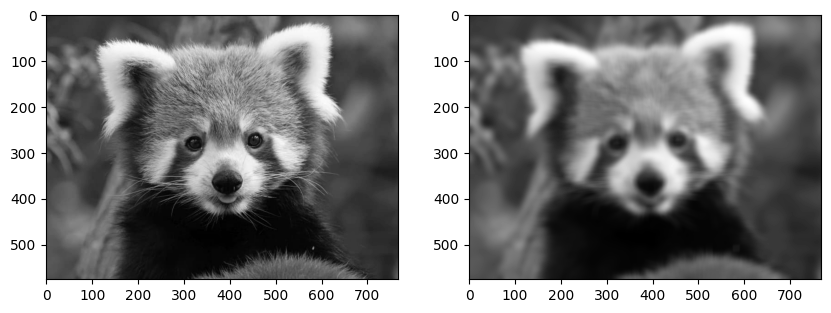

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(im_gray, cmap="gray")
ax2.imshow(im_blur, cmap="gray")

### Create edge detection mask

In [88]:
x_mask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
y_mask = x_mask.T.copy()

In [89]:
fx = signal.convolve2d(im_gray, x_mask, boundary="symm", mode="same")
fy = signal.convolve2d(im_gray, y_mask, boundary="symm", mode="same")

In [90]:
gm = (fx**2 + fy**2) ** 0.5

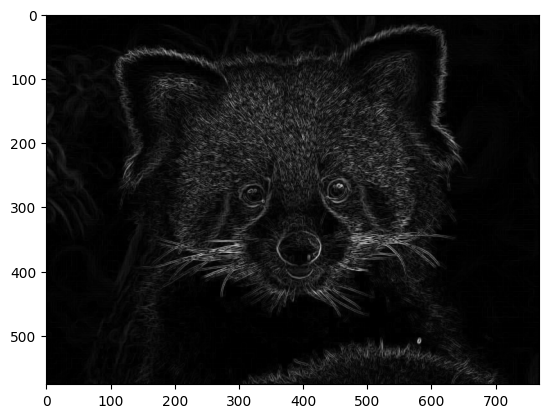

In [91]:
plt.imshow(gm, cmap="gray")

### Add edge threshold

In [92]:
th = gm.max() - 10.4*gm.std()
th

71.68860391364325

In [93]:
im_edge = gm > th

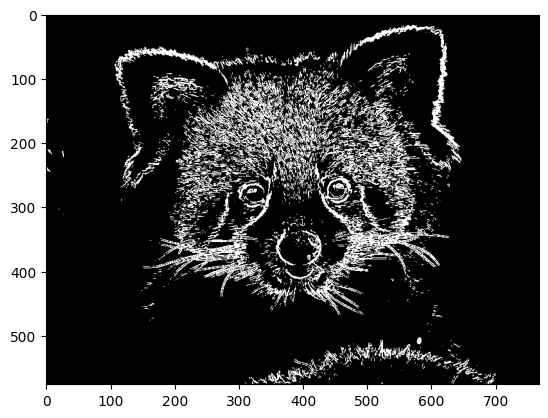

In [94]:
plt.imshow(im_edge, cmap="gray")

### Image sharpening

In [95]:
im_sharp = im_blur + .6*gm

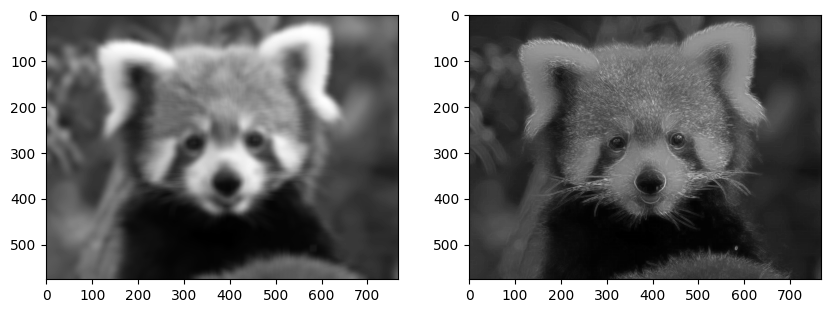

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(im_blur, cmap="gray")
ax2.imshow(im_sharp, cmap="gray")